In [1]:
#import all packages that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import both csv files and concatenate into one df only
df75 = pd.read_csv('finch_beaks_1975.csv')
df12 = pd.read_csv('finch_beaks_2012.csv')

column_names = ['band', 'species','beak_length', 'beak_depth']
df75.columns = column_names
df12.columns = column_names

In [3]:
#add a column with the year for each df, so when we concatenate it won't miss this info
df75['year'] = 1975
df12['year'] = 2012

df = pd.concat([df75, df12])
print(df.head())

   band species  beak_length  beak_depth  year
0     2  fortis          9.4         8.0  1975
1     9  fortis          9.2         8.3  1975
2    12  fortis          9.5         7.5  1975
3    15  fortis          9.5         8.0  1975
4   305  fortis         11.5         9.9  1975


In [4]:
#Create separate arrays with beak_depth data from each year
bd_1975 = df75['beak_depth'].values
#print(bd_1975[:5])
bd_2012 = df12['beak_depth'].values
#print(bd_2012[:5])

#Create separate arrays with beak_length data from each year
bl_1975 = df75['beak_length'].values
#print(bd_1975[:5])
bl_2012 = df12['beak_length'].values
print(bd_2012[:5])

[8.5 8.9 7.5 9.6 9.2]


# Defining all functions we will use

In [5]:
#defining ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    y=np.arange(1, len(data)+1)/float(len(data))
    x=np.sort(data)
    return x,y

# define bootstrap replicate function
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

#Define bootstrap replicates function
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

#Define function to do pairs bootstrap
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

#Define function to do pairs bootstrap (with call signature)
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

#Define a function to computie the Pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# EDA of beak depths of Darwin's finches

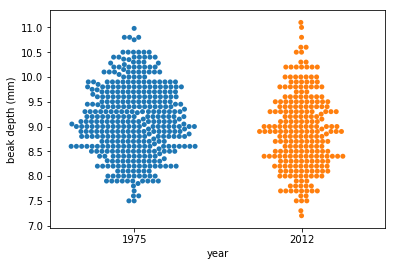

"\nWe can see that in 2012, the beak depth distribution varies more\nand the values from 2012 might have a higher mean\nTo make sure, let's do better than just eyeballing! Let's plot a ECDF!\n"

In [6]:
#create bee swarm plot to showing the column year and 'beak_depth'
# Create bee swarm plot
_ = sns.swarmplot(data=df, x='year', y='beak_depth')

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()
plt.savefig('1.png')
"""
We can see that in 2012, the beak depth distribution varies more
and the values from 2012 might have a higher mean
To make sure, let's do better than just eyeballing! Let's plot a ECDF!
"""

# ECDFs of beak depths

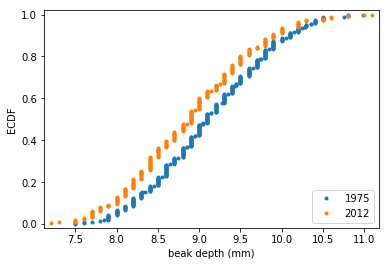

'\nWith this graph we can see that the mean from 2012 data is higher\n'

In [10]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()
plt.savefig('2.png')
"""
With this graph we can see that the mean from 2012 data is higher
"""

# Parameter estimates of beak depths

In [8]:
# Estimate the difference of the mean beak depth of SCANDENS sample from 75 and 12, report a 95% conf inter
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')
print(bs_replicates_1975)
print(bs_replicates_2012)

('difference of means =', -0.22313275434243174, 'mm')
('95% confidence interval =', array([-0.33837391, -0.1092514 ]), 'mm')
[9.16054591 9.08667494 9.10459057 ... 9.16151365 9.16342432 9.08409429]
[8.93447581 8.85766129 8.84495968 ... 8.94899194 8.91754032 8.88487903]


# Hypothesis test: Are beaks deeper in 2012?

Is it possible that the beak is not deeper in 2012 than in 1975,
and that this result is just due to chance?
What is the probability that we would get the observed difference in mean beak depth if the means were the same?


Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution.
For that we could use a permutation test. The hypothesis is that the means are equal.
To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.


In [9]:
#Make a concatenated array of the 1975 and 2012 beak depths and compute and store its mean.
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
# subtract their individual means from themselves and add the combined_mean
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)
"""
We get a p-value of 0.0034, which suggests that there is a statistically significant difference.
But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means.
You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards.
If it kept changing at that rate, the beak depth would double in only 400 years.
"""

('p =', 1)


'\nWe get a p-value of 0.0034, which suggests that there is a statistically significant difference.\nBut remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means.\nYou should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards.\nIf it kept changing at that rate, the beak depth would double in only 400 years.\n'

# EDA of beak length and depth

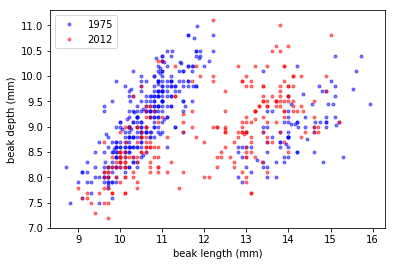

'\nGreat work! In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer.\nIf anything, they got a bit shorter, since the red dots are to the left of the blue dots.\nSo, it does not look like the beaks kept the same shape; they became shorter and deeper.\n'

In [10]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()
plt.savefig('3.png')
"""
Great work! In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer.
If anything, they got a bit shorter, since the red dots are to the left of the blue dots.
So, it does not look like the beaks kept the same shape; they became shorter and deeper.
"""

# Linear Regression
Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

In [11]:
#Compute linear regressions
#The slope and intercept for each of the datasets can be calculated using np.polyfit
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

#Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

#compute confidence intervals os slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

#Results
print('1975: slope = ', slope_1975, 'conf int = ', slope_conf_int_1975)
print('1975: intercept = ', intercept_1975, 'conf int = ', intercept_conf_int_1975)
print('2012: slope = ', slope_2012, 'conf int = ', slope_conf_int_2012)
print('2012: intercept = ', intercept_2012, 'conf int = ', intercept_conf_int_2012)

('1975: slope = ', 0.0945968320892116, 'conf int = ', array([0.05558194, 0.13333868]))
('1975: intercept = ', 8.053907980716424, 'conf int = ', array([7.63034459, 8.50392973]))
('2012: slope = ', 0.2794214839611248, 'conf int = ', array([0.23758595, 0.31933737]))
('2012: intercept = ', 5.548559204612316, 'conf int = ', array([5.07010234, 6.03896777]))


# Displaying the linear regression results

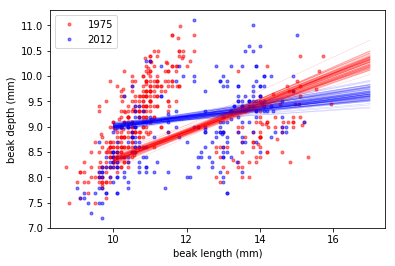

In [12]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()
plt.savefig('4.png')

# Beak length to depth ratio

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

In [13]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)
# The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. 
# The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed

('1975: mean ratio =', 1.2461609991094327, 'conf int =', array([1.22322956, 1.2698502 ]))
('2012: mean ratio =', 1.3483617710027853, 'conf int =', array([1.32444419, 1.37204034]))


# EDA of heritability
The array bd_parent_scandens contains the average beak depth (in mm) of two parents of the species G. scandens. The array bd_offspring_scandens contains the average beak depth of the offspring of the respective parents. The arrays bd_parent_fortis and bd_offspring_fortis contain the same information about measurements from G. fortis birds.

In [14]:
#import csv of heritability to a df
df_fortis_h = pd.read_csv('fortis_beak_depth_heredity.csv')
print(df_fortis_h.head())
df_scandens_h = pd.read_csv('scandens_beak_depth_heredity.csv')
print(df_scandens_h.head())

#create a df for parent and offspring of each species
bd_parent_scandens = df_scandens_h['mid_parent'].values
bd_offspring_scandens = df_scandens_h['mid_offspring'].values
bd_parent_fortis = (df_fortis_h['Male BD'].values + df_fortis_h['Female BD'].values)
bd_offspring_fortis = df_fortis_h['Mid-offspr'].values

   Mid-offspr  Male BD  Female BD
0       10.70    10.90        9.3
1        9.78    10.70        8.4
2        9.48    10.70        8.1
3        9.60    10.70        9.8
4       10.27     9.85       10.4
   mid_parent  mid_offspring
0      8.3318         8.4190
1      8.4035         9.2468
2      8.5317         8.1532
3      8.7202         8.0089
4      8.7089         8.2215


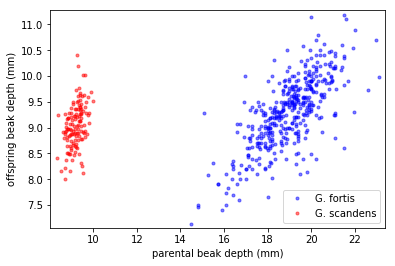

"\nIt appears as though there is a stronger correlation in G. fortis than in G. scandens. \nThis suggests that beak depth is more strongly inherited in G. fortis. \nWe'll quantify this correlation next.\n"

In [15]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Set margins
plt.margins(0.02)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()
plt.savefig('5.png')
'''
It appears as though there is a stronger correlation in G. fortis than in G. scandens. 
This suggests that beak depth is more strongly inherited in G. fortis. 
We'll quantify this correlation next.
'''

# Correlation of offspring and parental data
In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

# Pearson correlation of offspring and parental data
The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

In [16]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)
'''
It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents 
is more strongly correlated with their offspring than their G. scandens counterparts.
'''


('G. scandens:', 0.41170636294012597, array([0.26784032, 0.54590458]))
('G. fortis:', 0.7283412395518486, array([0.67010443, 0.78208881]))


'\nIt is clear from the confidence intervals that beak depth of the offspring of G. fortis parents \nis more strongly correlated with their offspring than their G. scandens counterparts.\n'

# Measuting hritability
Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

In [17]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
    bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)
'''Here again, we see that G. fortis has stronger heritability than G. scandens. 
This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.'''

('G. scandens:', 0.5485340868685983, array([0.35804007, 0.73425442]))
('G. fortis:', 0.3614525955719078, array([0.3216893 , 0.39923328]))


'Here again, we see that G. fortis has stronger heritability than G. scandens. \nThis suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.'

# Is beak depth heritable at all in *G. scandens*?
The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this, you will do a pairs permutation test.

In [18]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)
'''You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. 
This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. 
If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.'''

('p-val =', 0)


'You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. \nThis strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. \nIf you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.'